In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Download dataset
mnist = tf.keras.datasets.mnist

#load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize
x_train, x_test = x_train/ 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define, train and evalue a linear model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)), # images are 28 x 28 in size
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 5)
model.evaluate(x_test,y_test)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4656 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3032 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.9245
Epoch 5/5
313/313 [==============================] - 0s 837us/step - loss: 0.2654 - accuracy: 0.9267


[0.26536795496940613, 0.9266999959945679]

In [ ]:
# 1A Plot loss and accuracy

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# TODO Create a history object to store the results of model.fit

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4718 - accuracy: 0.8760 - val_loss: 0.3112 - val_accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3045 - accuracy: 0.9152 - val_loss: 0.2819 - val_accuracy: 0.9212
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9204 - val_loss: 0.2719 - val_accuracy: 0.9243
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9237 - val_loss: 0.2688 - val_accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2671 - accuracy: 0.9255 - val_loss: 0.2685 - val_accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2626 - accuracy: 0.9272 - val_loss: 0.2661 - val_accuracy: 0.9256
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9283 - val_loss: 0.2664 - val_accuracy:

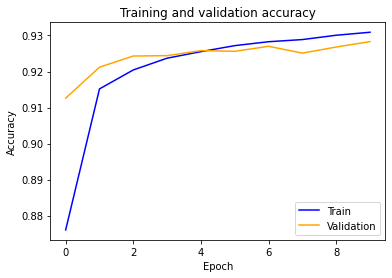

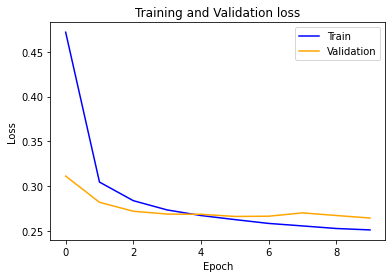

In [ ]:
# plot history
def plot(history):

  # The history object contains results on the training and validation sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()


  _= plt.figure()
  plt.title('Training and Validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label="Validation")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


plot(history)


In [ ]:
#1B Implement NN

# Single hidden layer
# Add a dense layer with 128 units and Relu Activation
# Train and evaluate
# How does the accuracy compare to the linear model above?

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2605 - accuracy: 0.9259 - val_loss: 0.1386 - val_accuracy: 0.9595
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1132 - accuracy: 0.9666 - val_loss: 0.0970 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9774 - val_loss: 0.0879 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0804 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0769 - val_accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0768 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0765 - val_accuracy:

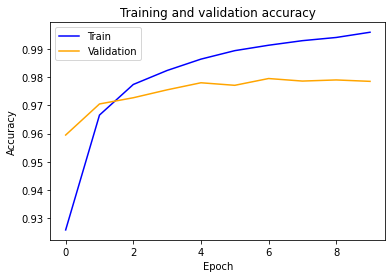

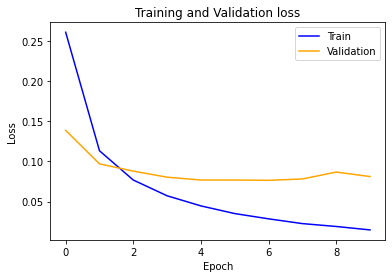

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

neural_history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =10)
plot(neural_history)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2348 - accuracy: 0.9270 - val_loss: 0.1591 - val_accuracy: 0.9533
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1064 - accuracy: 0.9678 - val_loss: 0.0969 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0777 - accuracy: 0.9757 - val_loss: 0.1074 - val_accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0636 - accuracy: 0.9801 - val_loss: 0.0853 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0912 - val_accuracy: 0.9736
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0925 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0768 - val_accuracy:

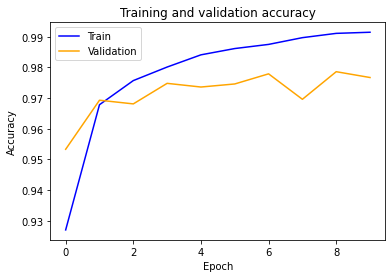

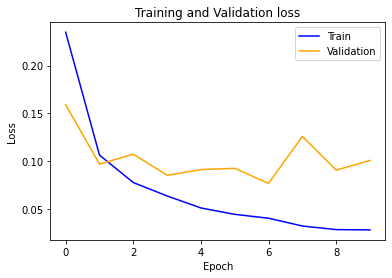

In [ ]:
#1C Implement a deep NN
# Modify the code below to create and train a deep neural network with at least two hidden layers

model = tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(input_shape=(28,28)),
                                     tf.keras.layers.Dense(128,activation='relu'),
                                     tf.keras.layers.Dense(128,activation='relu'),
                                    #  tf.keras.layers.Dropout(rate=.5),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
deep_history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)
plot(deep_history)

In [ ]:
# 1D make predictions on the entire test set using model.predict
# identify one image classified correctly, and one image classified incorrectly
# Display the images, correct labels, predicted labels, and confidence scores

In [ ]:
predictions = model.predict(x_test)

In [ ]:
# Check the first ten predicted labels and true labels to find examples of correct and incorrect predictions

# Create lists for all correct and incorrect positions
correct_prediction_indicies = []
incorrect_prediction_indicies = []

for i in range(len(predictions)):
  if (tf.math.argmax(predictions[i]) == y_test[i]): # Prediction is correct
    correct_prediction_indicies.append(i)
  else:
    incorrect_prediction_indicies.append(i)
    

In [ ]:
print(f'The first correct prediction occurs at index={correct_prediction_indicies[0]}')
print(f'The first incorrect prediction occurs at index={incorrect_prediction_indicies[0]}')

The first correct prediction occurs at index=0
The first incorrect prediction occurs at index=195


In [ ]:
# So we can assign variables to avoid typing the full list for clarity
first_correct_pred_index = correct_prediction_indicies[0]
first_incorrect_pred_index = incorrect_prediction_indicies[0]


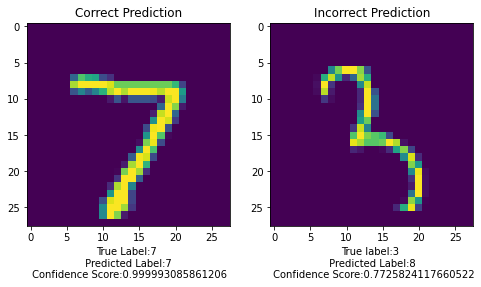

In [89]:
# Unclear about confidence score

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax[0].set_title("Correct Prediction")
ax[0].set_xlabel(f'True Label:{y_test[first_correct_pred_index]} \n Predicted Label:{np.argmax(predictions[first_correct_pred_index])} \n Confidence Score:{np.max(predictions[first_correct_pred_index])}')

ax[1].set_title("Incorrect Prediction")
ax[1].set_xlabel(f'True label:{y_test[first_incorrect_pred_index]} \n Predicted Label:{np.argmax(predictions[first_incorrect_pred_index])} \n Confidence Score:{np.max(predictions[first_incorrect_pred_index])}')

ax[0].imshow(x_test[first_correct_pred_index])
ax[1].imshow(x_test[first_incorrect_pred_index])





In [90]:
#Part 2 Subclassed Models
# Instead of using the built in model.fit methods, we will train models using GradientTape and the Keras Subclassing API


In [91]:
#download and prepare our dataset
# We also are going to use tf.data to batch and shuffle the data. 

# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds= tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)
    

tf.Tensor(9, shape=(), dtype=uint8)


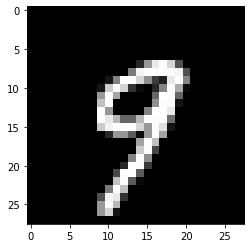

In [93]:
# Example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0],plt.get_cmap('gray'))
  print(label[0])

In [99]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [100]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
    
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Epoch 0, Test loss: 0.4805065393447876
Epoch 1, Test loss: 0.4006378948688507
Epoch 2, Test loss: 0.36765798926353455
Epoch 3, Test loss: 0.348627507686615
Epoch 4, Test loss: 0.3359058201313019
